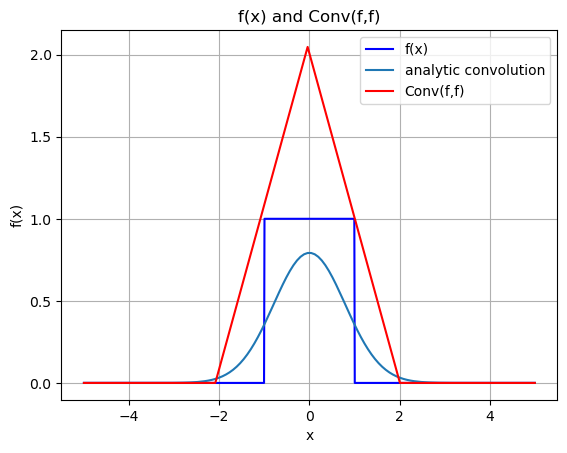

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    if -1<x and x<1:
        return 1
    else:
        return 0

def analytic(x):
    return np.sqrt(np.pi/5)*np.exp((-x**2)*(4/5))
np.vectorize(analytic_plot)

x_min = -5
x_max = 5
n = 128
dx = (x_max-x_min)/(n-1)
x_arr=np.arange(x_min,x_max+dx,dx,float)

f=np.vectorize(f)

g_arr=f(x_arr)
h_arr=f(x_arr)

padded_g=np.pad(g_arr, (0, len(g_arr)), mode='constant')
padded_h=np.pad(h_arr, (0, len(h_arr)), mode='constant')


dft_g=np.fft.fft(padded_g,norm="ortho")
dft_h=np.fft.fft(padded_h,norm="ortho")
 
gh_arr=np.multiply(dft_g,dft_h)

ift_arr=np.fft.ifft(gh_arr,norm="ortho") 
conv_arr=(dx*np.sqrt(2*n))*np.abs(ift_arr)


conv_arr=conv_arr[int(n/2):int(-n/2)]

plt.plot(x_arr2, f(x_arr2), c='blue',label="f(x)")
plt.plot(x_arr,analytic(x_arr),label = "analytic convolution")
plt.grid()
plt.plot(x_arr,conv_arr,c="red",label="Conv(f,f)")
plt.title("f(x) and Conv(f,f)")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend()
plt.show()